# lo que aprenderas 



- building a horses-or-humans classifier CNN + DNN, where the subject can be anywhere in the image (complex dataset)
- se usara un dataset de imagenes de caballos y personas, el cual esta compuesto de: 2 carpetas, 1 con imagenes de caballos en forma png, y la otr alo mismo con humanos. por lo cual no estan en forma de arrays y ademas no tenemos sus etiquetas. 
- aprenderas a descargar datasets de una pagina de descarga directa y guardarlos en la pc que te presta colab:
```
!wget --no-check-certificate \ # comando de consola 
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \ # pagina 
    -O /tmp/horse-or-human.zip  # directorio donde se guardara 
```
- a extraer el dataset .zip en tu maquina de la nube: 
```
import os
import zipfile
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()
```
- graficar una imgen de formato png a array:
```
# codigo sacado de 2 notebook ataque adversario.ipynb
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
caball = image.img_to_array(image.load_img(os.path.join(train_horse_dir, os.listdir(train_horse_dir)[imagen_indice])))
plt.imshow(caball.astype(np.uint8))
plt.show()
```
- otra forma de imprimir varias graficas especificando el tamaño de cada imagen en vez de un grid: 
```
import matplotlib.image as mpimg
nrows = 4
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
for i, img_path in enumerate(directorios_de_imagenes_PNG):
  sp = plt.subplot(nrows, ncols, i + 1) # creamos un grid 4,4 e indicamos que se coloque la imagen en la posicion 1 de 8 disponibles 
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path) # conviertes la imagen en array
  plt.imshow(img)
plt.show()
```
- The model.summary() method call prints a summary of the NN
- entenderemos por que usar usaremos una funcion de coste y optimizador en especifico :
  -  binary_crossentropy loss, because it's a binary classification problem and our final activation is a sigmoid.
  -  RMSprop optimization algorithm, is preferable to stochastic gradient descent (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as Adam and Adagrad, also automatically adapt the learning rate during training, and would work equally well here.)

- aprenderemos a usar el ImageDataGenerator para: convertir las imagenes en arrays, normalizar los datos, etiquetar los detos dependiendo su carpeta. 
  - Let's set up data generators that will read pictures in our source folders, convert them to float32 tensors
  - Our generators will yield batches of images of size 300x300 and their labels (binary).
- normalizar datos usando la libreria keras. In Keras this can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter.
```
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255) # All images will be rescaled by 1./255
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory with folders for each category (humans, horses)
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128, # Flow training images in batches of 128
        class_mode='binary') # Since we use binary_crossentropy loss, we need binary labels
# deberiamos instanciar otro ImageDataGenerator y repetir, para crear el dataset de validacion 
# el objeto train_generator sera el que pasaremos a la red como veremos abajo
```
- si solo quieres medir el accuracy de tu modelo ejecutas model.fit, pero si quieres guardaelo para hacer nuevas predicciones debes guardarlo en una variable 
```
history = model.fit(
      train_generator,
      validation_data = validation_generator,  # ademas del data de entrenamiento tambien pasamos el de evaluacion 
      epochs=15,
      steps_per_epoch=8,  # lotes de dataset de entrenamiento por epoch 
      validation_steps=8,  # lo mismo de arriba pero con la data de validacion 
      verbose=1)  # By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.
```
- aprenderemos a descargar una imagen de un link de internet y cargarla en una variable para usarla
```
import os
import requests
url = "https://img.gruporeforma.com/imagenes/elementorelacionado/10/28/9027782.jpg"
page = requests.get(url)
f_ext = os.path.splitext(url)[-1] # se sacara la extension del archivo
f_name = 'johnny{}'.format(f_ext) # creara el nombre del archivo a guardar 
with open(f_name, 'wb') as f: # esto es una fomra corta de crear un archivo, editarlo y cerrarlo al final 
    f.write(page.content) # en  el archivo f se le escribira el contenido de page 
```
- aprendimos otra forma de agregar una dimencion, al preprocesar una imagen para sumninistrara al modelo: 
- aprendimos como predecir e interpretar el output de nuestra CNN de clasificacion binaria. 
```
x = image.img_to_array(image.load_img(os.path.join("/content/elon.jpg"), target_size=(300, 300)))
x = x / 255
x = np.expand_dims(x, axis=0) # agrega una dimencion (300, 300, 3) > (1, 300, 300, 3)
images = np.vstack([x]) #Stack arrays in sequence vertically (row wise), apila imagenes para generar un lote
classes = model.predict(images, batch_size=10)
if classes[0]>0.5:
  print(nombre + " is a horse")
else:
  print(nombre + " is a human" )
```

- otra forma de cargar una imagen y transformarla en array y de agregar una dimension 
- a utilizar dos listas en un bucle for usando zip
- aprenderemso a visualizar las representaciones internas de una CNN. como en el NOTEBOOK 2 de ataques adversarios de DOTCSV , "3.1 comparing DNN vs CNN in fashionMNIST"
- a crear un nuevo modelo el cual genere no solo genere un output en la ultima capa si no en todas:
- como concatenar imagenes para crear una sola imagen grande y plotearla

```
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

img = load_img(img_path, target_size=(300, 300)) 
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)
x /= 255

# pasamos nuestra imagen por el nuevo modelo y obtendremos los outputs de cada una de las capas
successive_feature_maps = visualization_model.predict(x)  
# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# esto es una forma para sacar datos de 2 listas simultaneamente en un solo bucle for 
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4: # los output de las capas de convolucion y maxpooling tendran la forma = (1,altura, ancho, #de_mapas_caracteristicas) = 4D 
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map, calcula la forma de la ultima dimension que contiene los mapas de carac
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1] # anchura de la imagen
    # We will tile our images in this matrix
    # vamos a concatenar imagenes para crear una imagen supergrande y plotearla, cada imagen sera un mapa de caracteristicas 
    display_grid = np.zeros((size, size * n_features)) 
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable. pasar del rango (0,1)> (0,255) y cambiar el astype
      x = feature_map[0, :, :, i]
      x -= x.mean()
      #if x.std() > 0:
       # x /= x.std() # Compute the standard deviation
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x # indica(coloca en todas las filas, desde la columna 0 hasta la columna 300)
    # Display the grid
    scale = 100. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
```


True nam of the notebook    
Copia de Lab5-Using-Convolutions-With-Complex-Images.ipynb    
name of the codelab   
Use convolutional neural networks (CNNs) with complex images
What you'll learn   
How to train computers to recognize features in an image in which the subject isn't clear    
What you'll build    
A convolutional neural network that can distinguish between pictures of horses and pictures of humans
# resumen 
- 2. Getting Started: Acquire the data
- 3. Use the ImageGenerator to label and prepare the data
- 4. Explore the data
- 5. Define the model
- 6. Compile the model
- 7. Train the model from generators
- 8. Do the training
- 9. Test the model
- 10. Visualize intermediate representations

##Using Convolutions with Complex Images

In the previous labs you used the **Fashion MNIST** dataset to train an image classifier. In this case you had images that were 28x28 **where the subject was centered**. **In this lab** you'll take this to the next level, training to recognize features in an image where **the subject can be *anywhere* in the image!**

You'll do this by **building a horses-or-humans classifier** that will tell you if a given image contains a horse or a human, where the network is trained to recognize features that determine which is which.


In the case of Fashion MNIST, the data was built into TensorFlow via Keras. In this case the data isn't so you'll have to do some processing of it before you can train. 

# 1.1 let's download the data:

# como descargar archivos de un link 

https://www.delftstack.com/es/howto/linux/how-to-use-wget-command-in-linux/
how to use wet 
Podemos usar el comando wget en Linux para descargar archivos de Internet usando los protocolos HTTP, HTTPS y FTP con varias opciones como descargar múltiples archivos a la vez, descargar en segundo plano, limitar el ancho de banda, y mucho más.      
cada vez que quieres usar un comando de la consola y no de python especificaremos el comando con el simbolo "!" seguida del comando. 
el comando wet sirve para descargar ficheros dando un link. 


```
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
```
- "!": especifica que colocaremso un comando a la consola 
- "wget": comando de descarga 
- --no-check-certificate: 
- "/": se usa para usar un salto de linea sin perjudicar la sintaxis corrida del comando
- " https://storage...": link de descarga directa 
- "-O /tmp/rps.zip": el parametro -o Gsirve para guardar el archivo descargado usando wget con un nombre de archivo personalizado


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2022-02-14 18:32:47--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 74.125.140.128, 108.177.15.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  42.7MB/s    in 3.3s    

2022-02-14 18:32:51 (42.7 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2022-02-14 18:32:51--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.140.128, 108.177.15.128, 173.194.76.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.140.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11

# 1.1.2 extract the zip file in tehcolab machine using OS and ZIP file
The following python code will use the OS library to use Operating System libraries, giving you access to the file system, and the zipfile library allowing you to unzip the data. 

In [ ]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

# 1.1.3 labeling the data with ImageGenerator
The contents of the .zip are extracted to the base directory `/tmp/horse-or-human`, which in turn (que a su vez) each contain `horses` and `humans` subdirectories.

In short: The training set is the data that is used to tell the neural network model that 'this is what a horse looks like', 'this is what a human looks like' etc. 

## image generator label the data based on the directory of data

**One thing to pay attention to in this sample: We do not explicitly label the images as horses or humans. If you remember with the fashion example earlier, we had labelled 'this is a 1', 'this is a 7' etc**. 

Later you'll see something called an **ImageGenerator** being used -- and this is coded to **read images from subdirectories, and automatically label them from the name of that subdirectory**. So, for example, you will have a 'training' directory containing a 'horses' directory and a 'humans' one. **ImageGenerator will label the images appropriately for you, reducing a coding step**. 

Let's define each of these directories:

In [ ]:

# en teoria no es necesario usar el comando os.path.join ya que este sirve para unir directorios dados como str 
# deberia funcionar igual el codigo <validation_human_dir = '/tmp/validation-horse-or-human/humans' > 
# hice la prueba con los 2 primeros y funciono  

# Directory with our training horse pictures
train_horse_dir = '/tmp/horse-or-human/horses'

# Directory with our training human pictures
train_human_dir = '/tmp/horse-or-human/humans'

# Directory with our validation horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our validation human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

Now, let's see what the filenames look like in the `horses` and `humans` training directories:

In [ ]:
# os.list regresa una lista de los nombres del contenido de la carpeta train_horse_dir
train_horse_names = os.listdir(train_horse_dir)
# imprimimos de [0:10] los nombres de los archivos de la carpeta train_horse_dir
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse12-6.png', 'horse21-1.png', 'horse45-7.png', 'horse20-9.png', 'horse31-6.png', 'horse10-3.png', 'horse25-2.png', 'horse28-1.png', 'horse06-8.png', 'horse04-9.png']
['human03-13.png', 'human12-00.png', 'human12-01.png', 'human04-15.png', 'human16-04.png', 'human01-04.png', 'human16-13.png', 'human11-12.png', 'human08-09.png', 'human04-23.png']


Let's find out the total number of horse and human images in the directories:

In [ ]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


#1.2 analizando nuestro dataset
hasta ahora tenemos un dataset que consta de 2 carpetas, 1 con imagenes.png de caballos y otra con humanos. lo mismo para el dataset de evaluacion.   
ten en consideracion que en los trabajos anteriores nuestro dataset de imagenes en forma de arrays. no en archivos de imagenes.   
Si ejecutamos la linea de abajo veremos cosas relevantes de nustro dataset:
- nuestro dataset son imagenes formato .png
- las dimensiones de la imagen son (300,300,3) la ultima dimension muestra que RGB
- el rango intensidad por pixel va de 0 - 255. esto sera util di queremos normalizar los datos. 
## imprimir imagenes en formato jpg, png vs formato array 
vemos la diferencia de imprimir imagenes en formato array como lo hicimos abajo. en comapracion de imprimir en formato png como se hizo con los lotes de abajo. 

In [ ]:
# print(os.path.join(train_horse_dir, os.listdir(train_horse_dir)[ncaba]))
# asd = os.path.join("/content/img.jpg")

valor mas alto del array:  255.0
valor mas bajo del array:  4.0
(300, 300, 3)


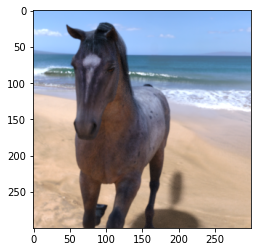

In [ ]:
# codigo sacado de 2 notebook ataque adversario.ipynb
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

ncaba = 3
caball = image.img_to_array(image.load_img(os.path.join(train_horse_dir, os.listdir(train_horse_dir)[ncaba])))
print("valor mas alto del array: ", np.max(caball))
print("valor mas bajo del array: ", np.min(caball))

print(caball.shape)
plt.imshow(caball.astype(np.uint8))
plt.show()

Now let's take a look at a few pictures to get a better sense of what they look like. First, configure the matplot parameters:

In [ ]:
# %matplotlib inline

import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 8

Now, display a batch of 8 horse and 8 human pictures. You can rerun the cell to see a fresh batch each time:


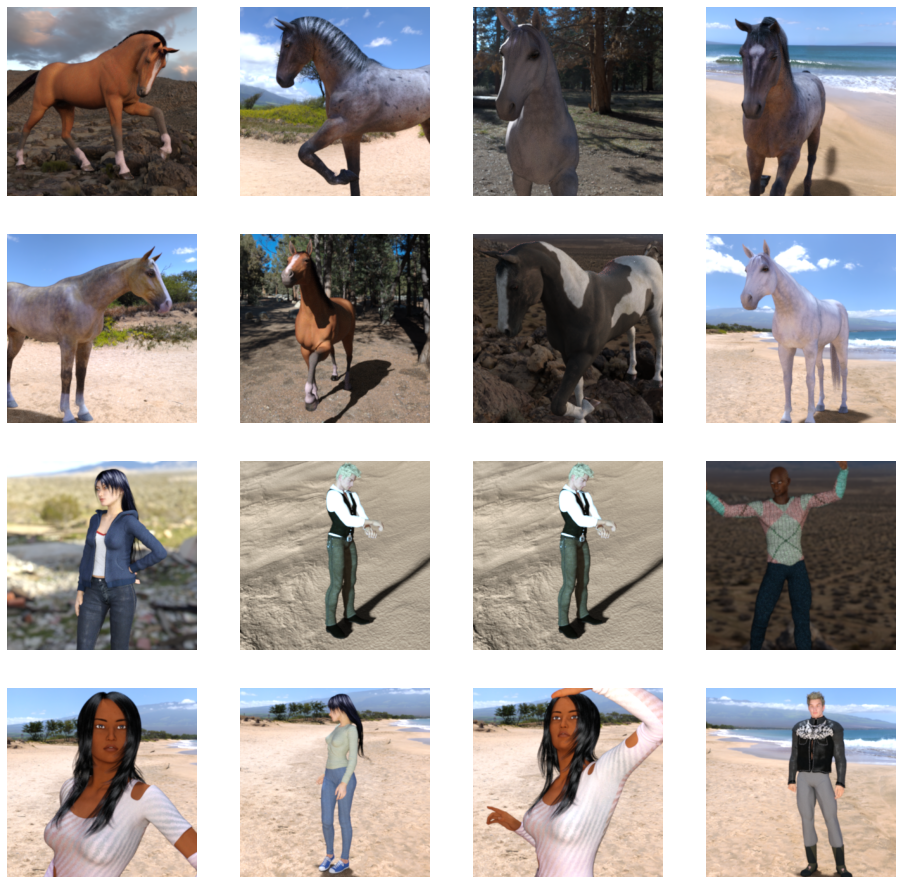

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
# otra forma de crear subplots diferente a la del colab anterior 
# ten en consideracion que en este caso nuestro dataset aun son imagenes y no arrays como en el colab 3.1

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

# join une el directorio con el nombre de las primeras 8 imagenes
# entonces crear una lista con el directorio de cada imagen
# ver colab 4 si no entiendes la simplificacion de for
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  # i range (0,1,2..15)
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


## Building a Small Model from Scratch

But before we continue, let's start defining the model:

Step 1 will be to import tensorflow.

In [ ]:
"""try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass"""

'try:\n  # %tensorflow_version only exists in Colab.\n  %tensorflow_version 2.x\nexcept Exception:\n  pass'

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


We then add convolutional layers as in the previous example, and flatten the final result to feed into the densely connected layers.

Finally we add the densely connected layers. 
## la clasificacion sera binaria asi que al final usaremos una funcion sigmoide en vez de softmax

Note that because we are facing a two-class classification problem, i.e. a *binary classification problem*, we will end our network with a [*sigmoid* activation](https://wikipedia.org/wiki/Sigmoid_function), so that the output of our network will be a single scalar between 0 and 1, encoding the probability that the current image is class 1 (as opposed to class 0).

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', 
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#The model.summary() method call prints a summary of the NN
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

The "output shape" column shows how the size of your feature map evolves in each successive layer. The convolution layers reduce the size of the feature maps by a bit due to padding(marco, margen), and each pooling layer halves (reduce a la mitad) the dimensions.  
# tenemos que usar la loos = binary_crossentropy por que usamos funcion sigmiode al final 
## loss metrics
Next, we'll configure the specifications for model training. We will train our model with the `binary_crossentropy` loss, **because it's a binary classification problem and our final activation is a sigmoid**. (For a refresher on loss metrics, see the [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/descending-into-ml/video-lecture).) We will use the `rmsprop` optimizer with a learning rate of `0.001`. During training, we will want to monitor classification accuracy.

**NOTE**: In this case, using the [RMSprop optimization algorithm](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) is preferable to [stochastic gradient descent](https://developers.google.com/machine-learning/glossary/#SGD) (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) and [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad), also automatically adapt the learning rate during training, and would work equally well here.)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


# Data Preprocessing

**Let's set up data generators that will read pictures in our source folders, convert them to `float32` tensors**, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. **Our generators will yield batches of images of size 300x300 and their labels (binary)**.
## la importancia de normalizar datos 

A**s you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network.** (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the `[0, 1]` range (originally all values are in the `[0, 255]` range).
### usando keras.rescale para normalizar datos
**In Keras this can be done via the `keras.preprocessing.image.ImageDataGenerator` class using the `rescale` parameter. This `ImageDataGenerator` class allows you to instantiate generators of augmented image batches (and their labels)** via `.flow(data, labels)` or `.flow_from_directory(directory)`. These generators can then be used with the Keras model methods that accept data generators as inputs: `fit_generator`, `evaluate_generator`, and `predict_generator`.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        class_mode='binary') # Since we use binary_crossentropy loss, we need binary labels

# es equivalente a usar image.img_to_array(image.load_img("dir", target_size = (299, 299))) de atras 
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


# Training
Let's train for 15 epochs -- this may take a few minutes to run.

Do note (tenga en cuenta) the values per epoch.

**The Loss and Accuracy are a great indication of progress of training**. It's making a guess as to the classification of the training data, and then measuring it against the known label, calculating the result. **Accuracy is the portion of correct guesses. **

## entrenando y validando al mismo tiempo 
### verbose parameter
By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.

verbose=0 will show you nothing (silent)

verbose=1 will show you an animated progress bar like this:

progres_bar

verbose=2 will just mention the number of epoch like this:

enter image description here
### steps_per_epoch, validation_steps
Basically, the two vars are: how many batches (training and evaluating data) per epoch you will yield.

In [ ]:

history = model.fit(
      train_generator,
      validation_data = validation_generator,  # ademas del data de entrenamiento tambien pasamos el de evaluacion 
      epochs=15,
      steps_per_epoch=8,  # lotes de dataset de entrenamiento por epoch 
      validation_steps=8,  # lo mismo de arriba pero con la data de validacion 
      verbose=1)  # By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.

print(help(history)) # creara un objeto Historial con la informacion del modelo durante el entrenamiento, como epocas, loss, val_loss, etc. 

Epoch 1/15
8/8 [==============================] - 20s 1s/step - loss: 6.3455 - accuracy: 0.4839 - val_loss: 0.8486 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 8s 1s/step - loss: 0.5524 - accuracy: 0.7553 - val_loss: 0.9729 - val_accuracy: 0.5703
Epoch 3/15
8/8 [==============================] - 8s 1s/step - loss: 0.3148 - accuracy: 0.8676 - val_loss: 1.2729 - val_accuracy: 0.6602
Epoch 4/15
8/8 [==============================] - 8s 1s/step - loss: 0.1545 - accuracy: 0.9422 - val_loss: 1.9517 - val_accuracy: 0.6602
Epoch 5/15
8/8 [==============================] - 8s 1s/step - loss: 0.0902 - accuracy: 0.9711 - val_loss: 1.8323 - val_accuracy: 0.6836
Epoch 6/15
8/8 [==============================] - 8s 999ms/step - loss: 0.0303 - accuracy: 0.9900 - val_loss: 2.2867 - val_accuracy: 0.6914
Epoch 7/15
8/8 [==============================] - 9s 1s/step - loss: 0.2005 - accuracy: 0.9209 - val_loss: 1.6835 - val_accuracy: 0.6914
Epoch 8/15
8/8 [=====================

# provando con imagenes descargadas de internet 
###Running the Model

Let's now take a look at actually running a prediction using the model (la ejecución real de una predicción). This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a horse or a human.

You can download images from the internet to your file system to try them out! 

Note that you might see that the network makes a LOT of mistakes, despite the fact that the training accuracy is above 99%.

This is due to something called **overfitting**, which means that the neural network is trained with very limited data -- there are only 500ish images of each class. So it's very good at recognizing images that look like those in the training set, but it can fail a lot at images that are not in the training set.

This is a data point proving that the more data you train on, the better your final network will be!

There are many techniques that can be used to make your training better, despite limited data, including something called Image Augmentation. That's beyond the scope of this lab!   

despues de intentar muchas formas para descargar una imagen a aprtir de una url en python encontre una respuesta en stack: 

https://stackoverflow.com/questions/8286352/how-to-save-an-image-locally-using-python-whose-url-address-i-already-know?newreg=36c5b93c54064f17b0cbeb9900b9f7e6#:~:text=This%20can%20be%20done%20with%20requests.%20Load%20the%20page%20and%20dump%20the%20binary%20content%20to%20a%20file

esta nos enseña como hacerlo.
#https://stackoverflow.com/questions/8286352/how-to-save-an-image-locally-using-python-whose-url-address-i-already-know?newreg=36c5b93c54064f17b0cbeb9900b9f7e6

In [ ]:
"""
aunque se decargaba la imagen esta estaba dañada
# usaremos el codigo de aqui https://www.scrapingbee.com/blog/download-image-python/
# con el fin de descargar una imagen apartir de una URL 
import requests # request img from web
import shutil # save img locally, is used to copy the contents of a file-like object to another file-like object
url = "https://www.noticaballos.com/wp-content/uploads/2015/12/caballo-evolucion.jpg"
file_name = "caballito.jpg" #prompt user for file_name and dir, si solo ponemos nombre lo cargara a /content/ 
res = requests.get(url, stream = True)
if res.status_code == 200:
    with open(file_name,'wb') as f:  # esto es una forma resumida de f=open(file_name,'wb')
        shutil.copyfileobj(res.raw, f) # write your image as the file name
    print('Image sucessfully Downloaded: ',file_name)
else:
    print('Image Couldn\'t be retrieved')"""
# mejor busque otras soluciones hasta que una funcionara en:

import os
import requests

# url = 'https://www.noticaballos.com/wp-content/uploads/2015/12/caballo-evolucion.jpg'
# url = "https://media.wired.com/photos/5deadbf63b0e6700088f1fde/1:1/w_750,h_750,c_limit/Biz-musk-AP_19338608014367.jpg"
url = "https://img.gruporeforma.com/imagenes/elementorelacionado/10/28/9027782.jpg"
page = requests.get(url)
# print(page.content)
f_ext = os.path.splitext(url)[-1] # se sacara la extension del archivo
f_name = 'johnny{}'.format(f_ext) # creara el nombre del archivo a guardar 
with open(f_name, 'wb') as f: # esto es una fomra corta de crear un archivo, editarlo y cerrarlo al final 
    f.write(page.content) # en  el archivo f se le escribira el contenido de page 

In [ ]:
import numpy as np
#from google.colab import files
from keras.preprocessing import image

"""uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = x / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x]) #Stack arrays in sequence vertically (row wise), apilarara las imagenes para crear un lote 
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")"""

nombre = "johnny.jpg"
x = image.img_to_array(image.load_img(os.path.join("/content/" + nombre), target_size=(300, 300)))
x = x / 255
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
classes = model.predict(x, batch_size=10)
print(classes[0])
if classes[0]>0.5:
  print(nombre + " is a horse")
else:
  print(nombre + " is a human" )

(300, 300, 3)
(1, 300, 300, 3)
[1.]
johnny.jpg is a horse


### Visualizing Intermediate Representations
# visualizaciones de las capas intermedias del modelo
**usamos las herramientas aprendidas en el NOTEBOOK 2 de ataques adversarios de DOTCSV y el notebook de este curso "3.1 comparing DNN vs CNN in fashionMNIST"**

To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

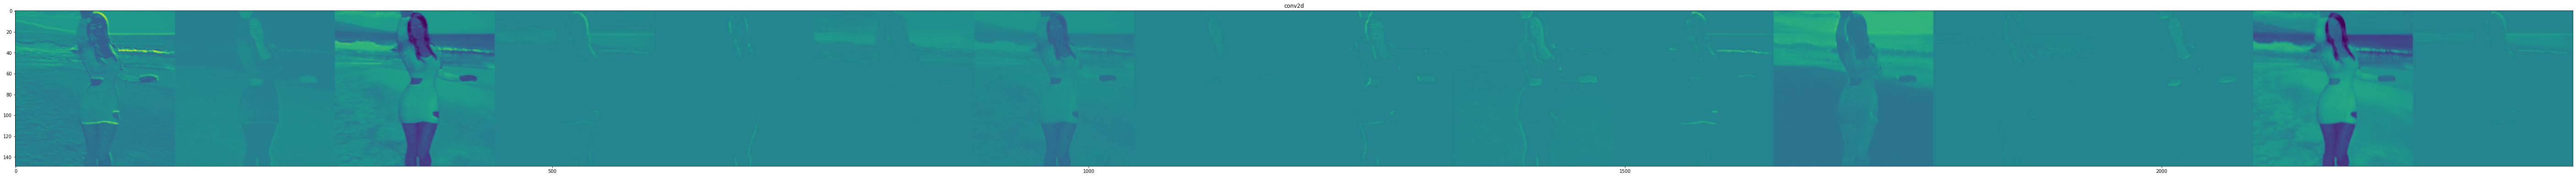

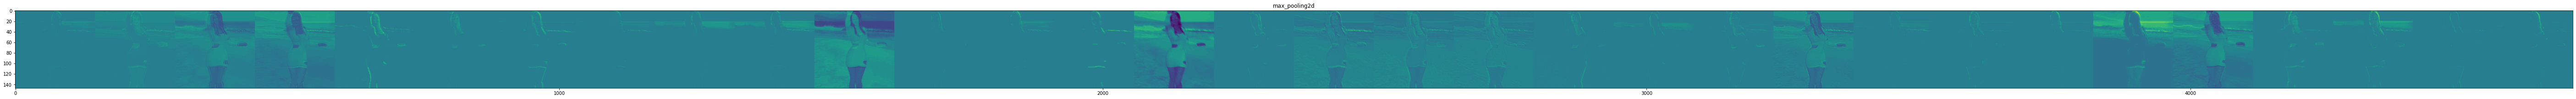

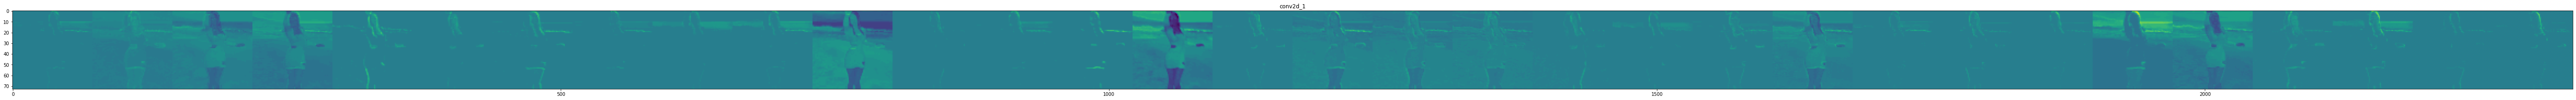

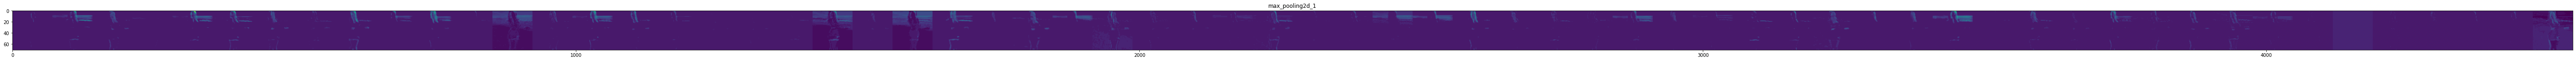

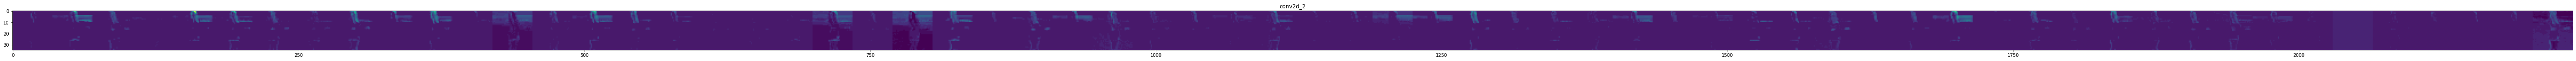

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files) # atras se crearon dos listas con todos los directorios de todas las imagenes de caballos y humanos, ahora solo se escogera un archivo 

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
# esto es una forma para sacar datos sde 2 listas simultaneamente en un solo bucle for 
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4: # los output de las capas de convolucion y maxpooling tendran la forma = (1,altura, ancho, #de_mapas_caracteristicas) = 4D 
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map, calcula la forma de la ultima dimension que contiene los mapas de carac
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1] # anchura de la imagen
    # We will tile our images in this matrix
    # vamos a concatenar imagenes para crear una imagen supergrande y plotearla, cada imagen sera un mapa de caracteristicas 
    display_grid = np.zeros((size, size * n_features)) 
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable. pasar del rango (0,1)> (0,255) y cambiar el astype
      x = feature_map[0, :, :, i]
      x -= x.mean()
      #if x.std() > 0:
       # x /= x.std() # Compute the standard deviation
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x # indica(coloca en todas las filas, desde la columna 0 hasta la columna 300)
    # Display the grid
    scale = 100. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# sparsity in DL 
As you can see we go from the raw pixels of the images to increasingly abstract and compact representations. **The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated"; most are set to zero. This is called "sparsity." Representation sparsity is a key feature of deep learning.**


These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. You can think of a convnet (or a deep network in general) as an information distillation pipeline.

## Clean Up

Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

In [ ]:
"""import os, signal
os.kill(os.getpid(), signal.SIGKILL)"""

'import os, signal\nos.kill(os.getpid(), signal.SIGKILL)'